# Métodos de tiro
#### https://meet.noysi.com/metodosnumericos2

Consideremos el PVF 
$$ -u''(t) = e^{t^2},\quad u(0)=u(1)=0.$$
Vamos a aproximar la solución aplicando métodos de tiro.

In [178]:
# Escribimos nuestra ecuación en forma de sistema u'=v, v'=-e^{t^2}
var('t,u,v')
eqns=[v,-exp(t^2)]

Sea $u(t,v_0)$ la solución de la ecuación diferencial determinada por las condiciones iniciales $u(0,v_0)=0$, $u'(0,v_0)=v_0$. 

Definimos $\phi(v_0)=u(1,v_0)$. Buscamos $v_0$ tal que $\phi(v_0)=0$, para lo que aplicaremos el método de la secante. Tomamos las condiciones iniciales $v_0=0$ y $v_0=1$.

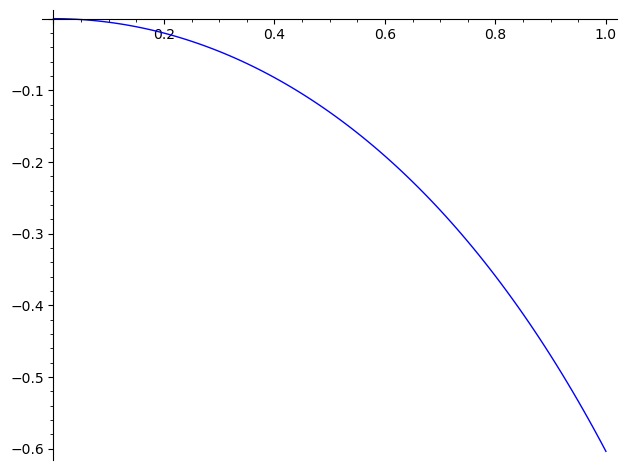

In [2]:
# Resolvemos el PVI u(0)=0, u'(0)=0
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,0],ivar=t,end_points=1,step=0.01)
line([(ti,ui) for ti,ui,vi in P])

In [4]:
# Sólo necesitamos el valor aproximado de u(1)
phi0=P[-1][1]
phi0

-0.6035108315286097

In [5]:
# Resolvemos el PVI u(0)=0, u'(0)=1
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,1],ivar=t,end_points=1,step=0.01)
# Sólo necesitamos el valor aproximado de u(1)
phi1=P[-1][1]
phi1

0.39648916847139

Ahora aplicamos un paso del método de la secante. Como el problema es lineal, sabemos que esto nos da la solución. 

In [6]:
# Calculamos x2 (que sabemos que es la condición inicial que queremos por ser el problema lineal)
v2 = -phi0/(phi1-phi0)
v2

0.6035108315286098

In [13]:
# Resolvemos el sistema para esa ecuación inicial y representamos la solución
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,v2],ivar=t,end_points=1,step=0.01)
v2, P[-1][1]

(0.6035108315286098, 9.71445146547012e-17)

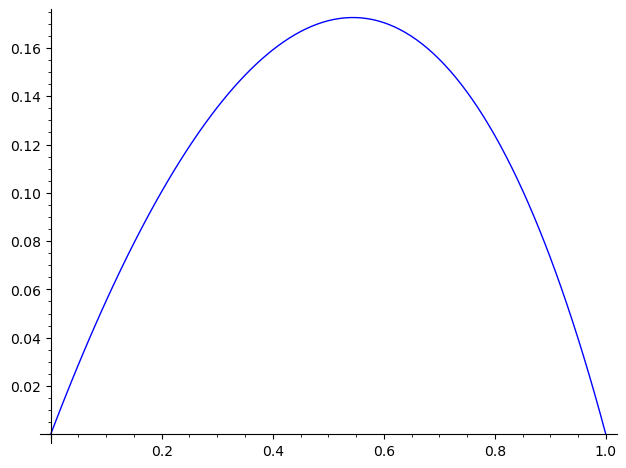

In [11]:
LP = line([ [i,j] for i,j,k in P])
LP

### Ejercicios

1. Aplicar el método anterior al PVF $$-u''(t) + u(t)=\cos(t),\quad u(0)=0,\ u(1)=0.$$
2. Aplicar el método anterior al PVF $$-u''(t) + u(t)=\cos(t),\quad u(0)=0,\ u(1)=1.$$
3. Consideremos el péndulo simple $u''+\sin(u)=0$, $u(0)=0$. Dicha ecuación tiene soluciones periódicas para cualquier periodo $T\geq 2\pi$. Fijemos el periodo $T=8$. Obtener una (la) solución que tiene dicho periodo (y que no es identicamente nula).  
4. Resolver el problema anterior aplicando el método de Taylor.
5. Consideremos el péndulo simple forzado $u'' + \sin(u) = \sin(4t/\pi)/2$ Obtener una solución que verifique las condiciones frontera $u(0)=u(4)=0$. Dibujar dicha solución para tiempos largos (40 o 100) para ver si es periódica.


In [53]:
var('t,u,v')
eqns=[v,u-cos(t)]
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,0],ivar=t,end_points=1,step=0.01)
phi0=P[-1][1]
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,1],ivar=t,end_points=1,step=0.01)
phi1=P[-1][1]
v2 = -phi0/(phi1-phi0)
0,phi0,1,phi1,v2

(0, -0.501389164409569, 1, 0.6738120291064539, 0.4266411293452563)

In [49]:
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,v2],ivar=t,end_points=1,step=0.01)
v2, P[-1][1]

(0.4266411293452563, -1.31405303305243e-16)

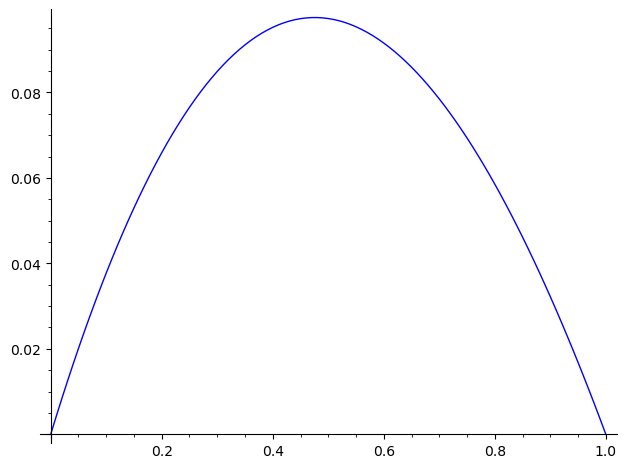

In [50]:
line([ [i,j] for i,j,k in P])

### 3

In [80]:
tuv = var('t,u,v')
eqns=[v,-sin(u)]
tuv

(t, u, v)

In [107]:
def phi(v0):
    P = desolve_system_rk4(eqns,[tuv[1],tuv[2]],ics=[0,0,v0],ivar=t,end_points=8,step=0.01)
    return P[-1][1]

In [116]:
phi(0),phi(1.)

(0.0, 0.9682219925811517)

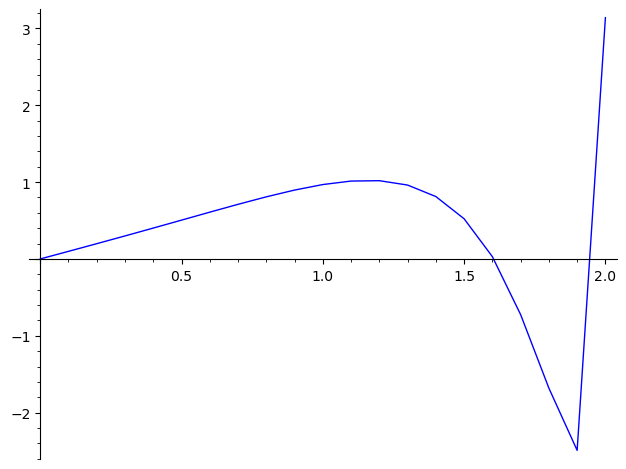

In [110]:
line([ (vk,phi(vk)) for vk in [0,0.1 .. 2] ])

In [118]:
v0 = 1.5
v1 = 1.6
v2 = (v0*phi(v1)-v1*phi(v0))/(phi(v1)-phi(v0))
v2, phi(v2)

(1.60609815471598, -0.008132645145088647)

In [119]:
v3 = (v1*phi(v2)-v2*phi(v1))/(phi(v2)-phi(v1))
v3, phi(v3)

(1.60479964452793, 8.45011547658571e-05)

In [120]:
v4 = (v2*phi(v3)-v3*phi(v2))/(phi(v3)-phi(v2))
v4, phi(v4)

(1.60481299777812, 2.33211416726664e-07)

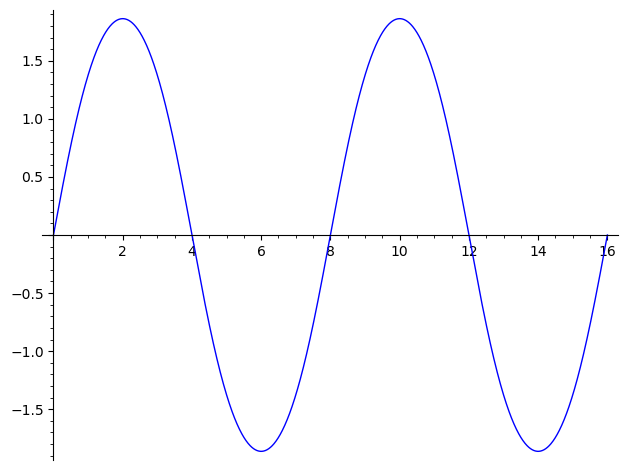

In [123]:
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,v4],ivar=t,end_points=16,step=0.01)
line([ [i,j] for i,j,k in P])

## Diferencias finitas

Consideremos el PVF 
$$ -u''(t) = e^{t^2},\quad u(0)=u(1)=0.$$
Vamos a aplicar ahora el método de las diferencias finitas.

In [170]:
# Función que define los coeficientes del sistema
def a(i,j):
    if i==j:
        return 2
    if abs(i-j)==1:
        return -1
    else:
        return 0

In [171]:
# Planteamos el sistema y lo resolvemos
N = 5
h = 1/(N+1)
A = h^-2*matrix([[a(i,j) for j in [1 .. N]] for i in [1 .. N]],sparse=true)
F = vector([exp((i*h)^2) for i in [1..N]]) 
show(A,F)

[ 72 -36   0   0   0]
[-36  72 -36   0   0]
[  0 -36  72 -36   0]
[  0   0 -36  72 -36]
[  0   0   0 -36  72] (e^(1/36), e^(1/9), e^(1/4), e^(4/9), e^(25/36))

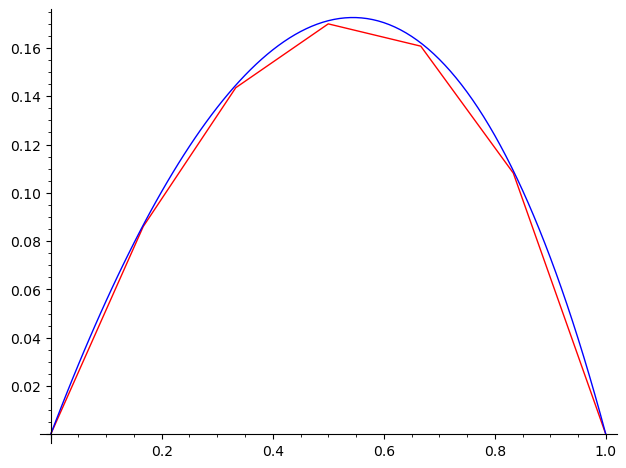

In [172]:
# Resolvemos el sistema
ui=A.solve_right(F)
# Representamos las soluciones
line(zip([i*h for i in [0..N+1]],[0]+list(ui)+[0]),color='red')+LP

### Ejercicios

1. Aplicar el método de las diferencias finitas al problema anterior con 20, 50 y 100 pasos. 
2. Aplicar el método de las diferencias finitas para resolver el PVF $$-u''(t) + t u(t)=2t+2,\quad u(0)=u(1)=0.$$ Nótese que en este caso hay que modificar la matriz del método. 
3. Aplicar el método de las diferencias finitas para resolver el PVF $$-u''(t) + t u(t)=2t+2+2u^2,\quad u(0)=u(1)=0.$$ En este caso, hay que aplicar un método de punto fijo para resolver el sistema. 

In [173]:
# Planteamos el sistema y lo resolvemos
N = 400
h = 1/(N+1)
A = h^-2*matrix(RDF,[[a(i,j) for j in [1 .. N]] for i in [1 .. N]],sparse=true)
F = vector(RDF,[exp((i*h)^2) for i in [1..N]]) 

CPU times: user 10.2 s, sys: 93.5 ms, total: 10.3 s
Wall time: 10.1 s


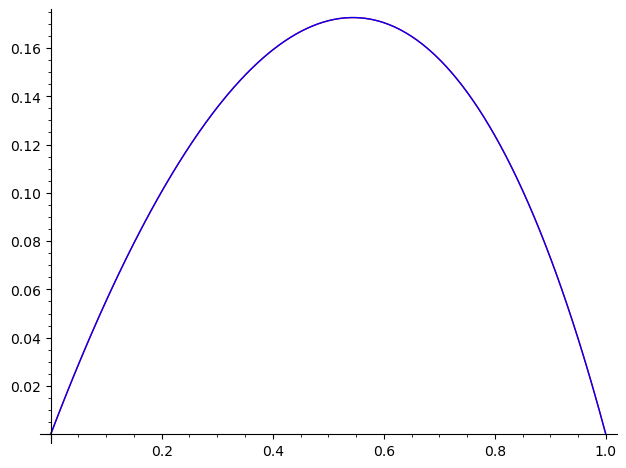

In [174]:
%%time
# Resolvemos el sistema
ui=A.solve_right(F)
# Representamos las soluciones
line(zip([i*h for i in [0..N+1]],[0]+list(ui)+[0]),color='red')+LP

In [176]:
ui[0]/h

0.6022630584064299

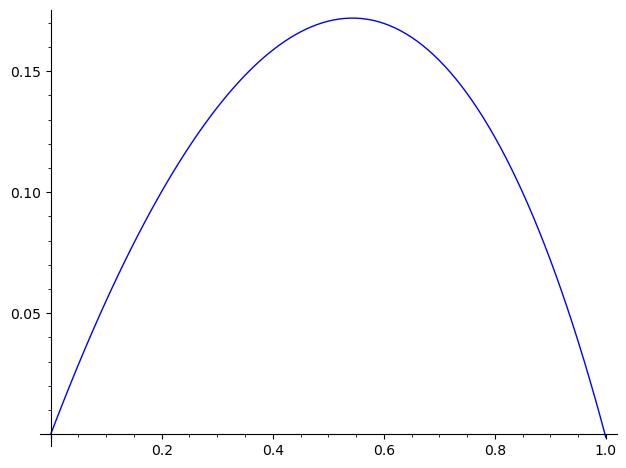

In [179]:
var('t,u,v')
eqns=[v,-exp(t^2)]
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,ui[0]/h],ivar=t,end_points=1,step=0.01)
line([ [i,j] for i,j,k in P])

2. Aplicar el método de las diferencias finitas para resolver el PVF $$-u''(t) + t u(t)=2t+2,\quad u(0)=u(1)=0.$$ Nótese que en este caso hay que modificar la matriz del método. 

In [181]:
# Función que define los coeficientes del sistema
def a(i,j,h):
    if i==j:
        return 2 + (j*h)*h^2
    if abs(i-j)==1:
        return -1
    else:
        return 0

In [182]:
# Planteamos el sistema y lo resolvemos
N = 400
h = 1/(N+1)
A = h^-2*matrix(RDF,[[a(i,j,h) for j in [1 .. N]] for i in [1 .. N]],sparse=true)
F = vector(RDF,[ 2*(j*h) + 2 for j in [1..N]]) 

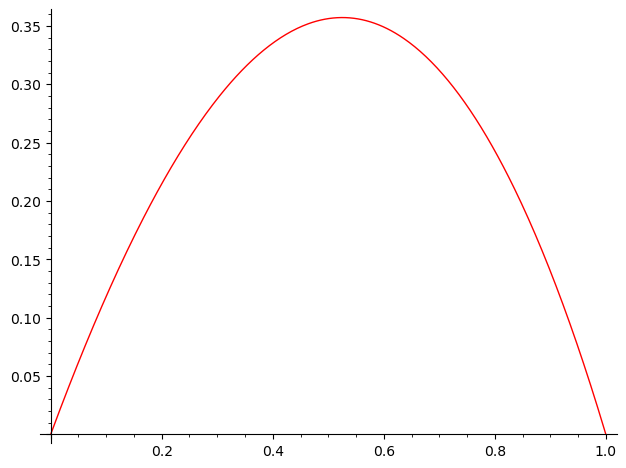

In [183]:
# Resolvemos el sistema
ui=A.solve_right(F)
# Representamos las soluciones
line(zip([i*h for i in [0..N+1]],[0]+list(ui)+[0]),color='red')

In [184]:
ui[0]/h

1.2832776741047596

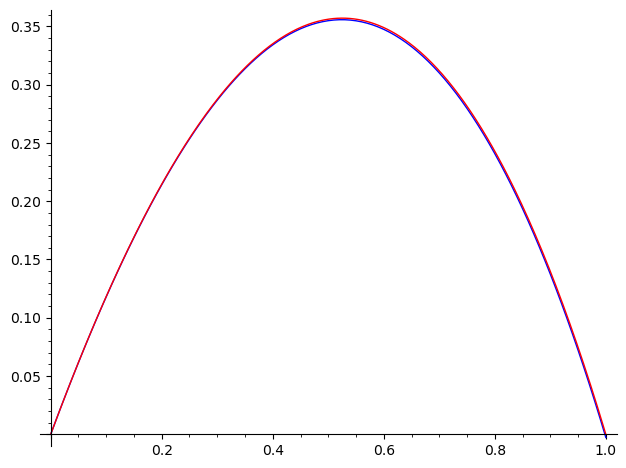

In [186]:
var('t,u,v')
eqns=[v,t*u-2*t-2]
P=desolve_system_rk4(eqns,[u,v],ics=[0,0,ui[0]/h],ivar=t,end_points=1,step=0.01)
line([ [i,j] for i,j,k in P]) \
+ line(zip([i*h for i in [0..N+1]],[0]+list(ui)+[0]),color='red')

In [164]:
%%time
import numpy as np
import scipy.sparse
import scipy.sparse.linalg
from scipy.sparse import diags
# Planteamos el sistema y lo resolvemos
N = 1600
h = 1/(N+1)
F = vector(RDF,[exp((i*h)^2) for i in [1..N]]) 
b = np.array(F)
diagonals = [2 * h**-2] * N
off_diagonals = [-h**-2] * (N - 1)
a = diags([off_diagonals, diagonals, off_diagonals], [-1, 0, 1], format='csr')
ui = scipy.sparse.linalg.spsolve(a, b)

CPU times: user 71.7 ms, sys: 9 µs, total: 71.7 ms
Wall time: 69.9 ms


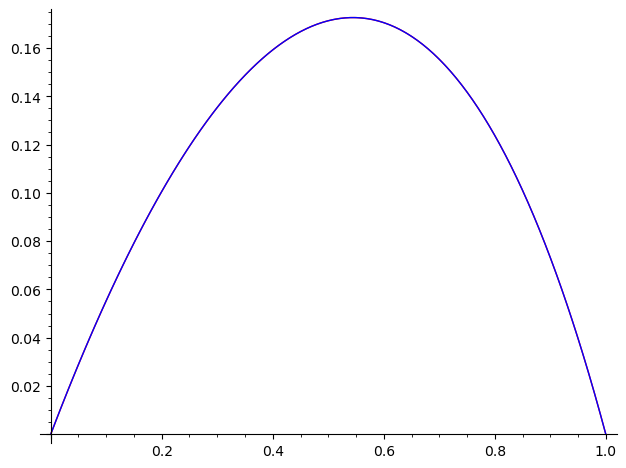

In [168]:
line(zip([i*h for i in [0..N+1]],[0]+list(ui)+[0]),color='red') + LP